# Execute the code below

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather["DATE"] = pd.to_datetime(df_weather["DATE"])

# You have now a DataFrame with weather data

In [3]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis.

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

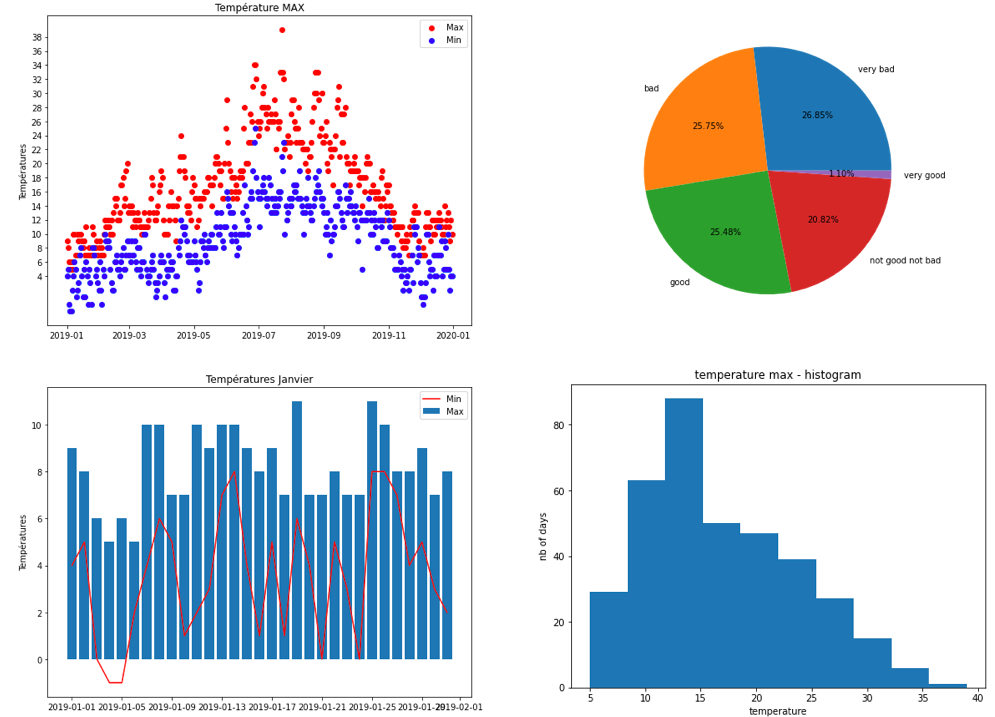

In [4]:
df = df_weather.copy()

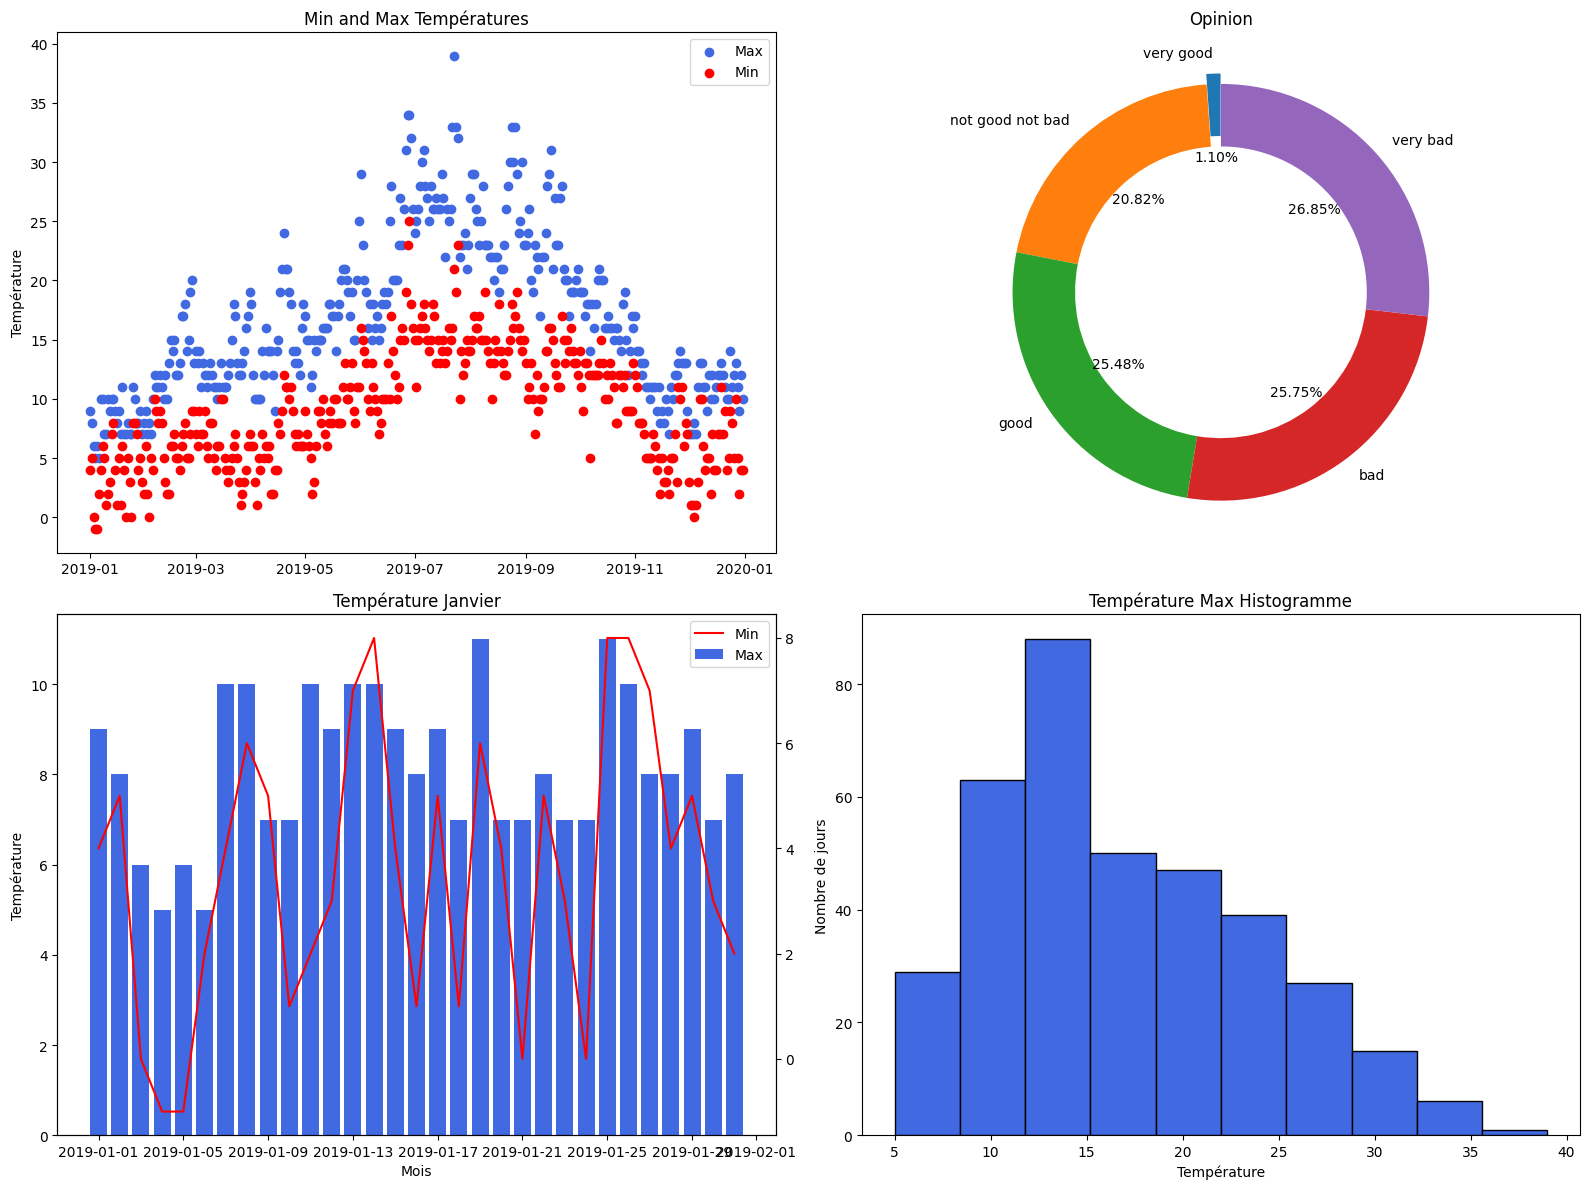

In [10]:
import matplotlib.gridspec as grid
# Complete the code below :
# df_weather["OPINION"].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it ?

opinion_count = df.groupby("OPINION").size().reset_index(name="total_opinion").sort_values(by="total_opinion")

annee = 2019
mois = 1

condi = (
    (df["DATE"].dt.month == mois) &
    (df["DATE"].dt.year == annee)
)
annee_mois = df[condi]

plt.figure(figsize=(16, 12))
gs = grid.GridSpec(
    2, 2,
    width_ratios=[1, 1],
    height_ratios=[1, 1]
)


""" -------------------- SCATTER -------------------- """
plt.subplot(gs[0])
plt.scatter(
    df["DATE"],
    df["MAX_TEMPERATURE_C"],
    color="royalblue",
    label = "Max"
)
plt.scatter(
    df["DATE"],
    df["MIN_TEMPERATURE_C"]
,
    color="red",
    label = "Min"
)
plt.legend(loc="upper right")
plt.title(label = "Min and Max Températures")
plt.ylabel("Température")


""" -------------------- PIE -------------------- """
# wedgeprops dict pour meilleure visualisation.
plt.subplot(gs[1])
explode = (0.05, 0, 0, 0, 0)
plt.pie(
    opinion_count["total_opinion"],
    labels=opinion_count["OPINION"],
    explode=explode,
    autopct="%1.2f%%",
    startangle=90,
    wedgeprops=dict(width=0.3)
)
plt.title(label = "Opinion")


""" -------------------- TWINS -------------------- """
ax1 = plt.subplot(gs[2])
ax1.bar(
    annee_mois["DATE"],
    annee_mois["MAX_TEMPERATURE_C"],
    color="royalblue",
    label="Max"
)
ax1.set_xlabel("Mois")
ax1.set_ylabel("Température",)

ax2 = ax1.twinx()
ax2.plot(
    annee_mois["DATE"],
    annee_mois["MIN_TEMPERATURE_C"],
    label="Min",
    color="red",
)
plt.title("Température Janvier")
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2 + lines, labels2 + labels, loc="upper right")


""" -------------------- HISTOGRAMME -------------------- """
plt.subplot(gs[3])
plt.hist(
    df["MAX_TEMPERATURE_C"],
    bins=10,
    color="royalblue",
    label="Nombre de jours",
    edgecolor="black"
)
plt.title("Température Max Histogramme")
plt.ylabel("Nombre de jours")
plt.xlabel("Température")


plt.tight_layout()
plt.show()

## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) :
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

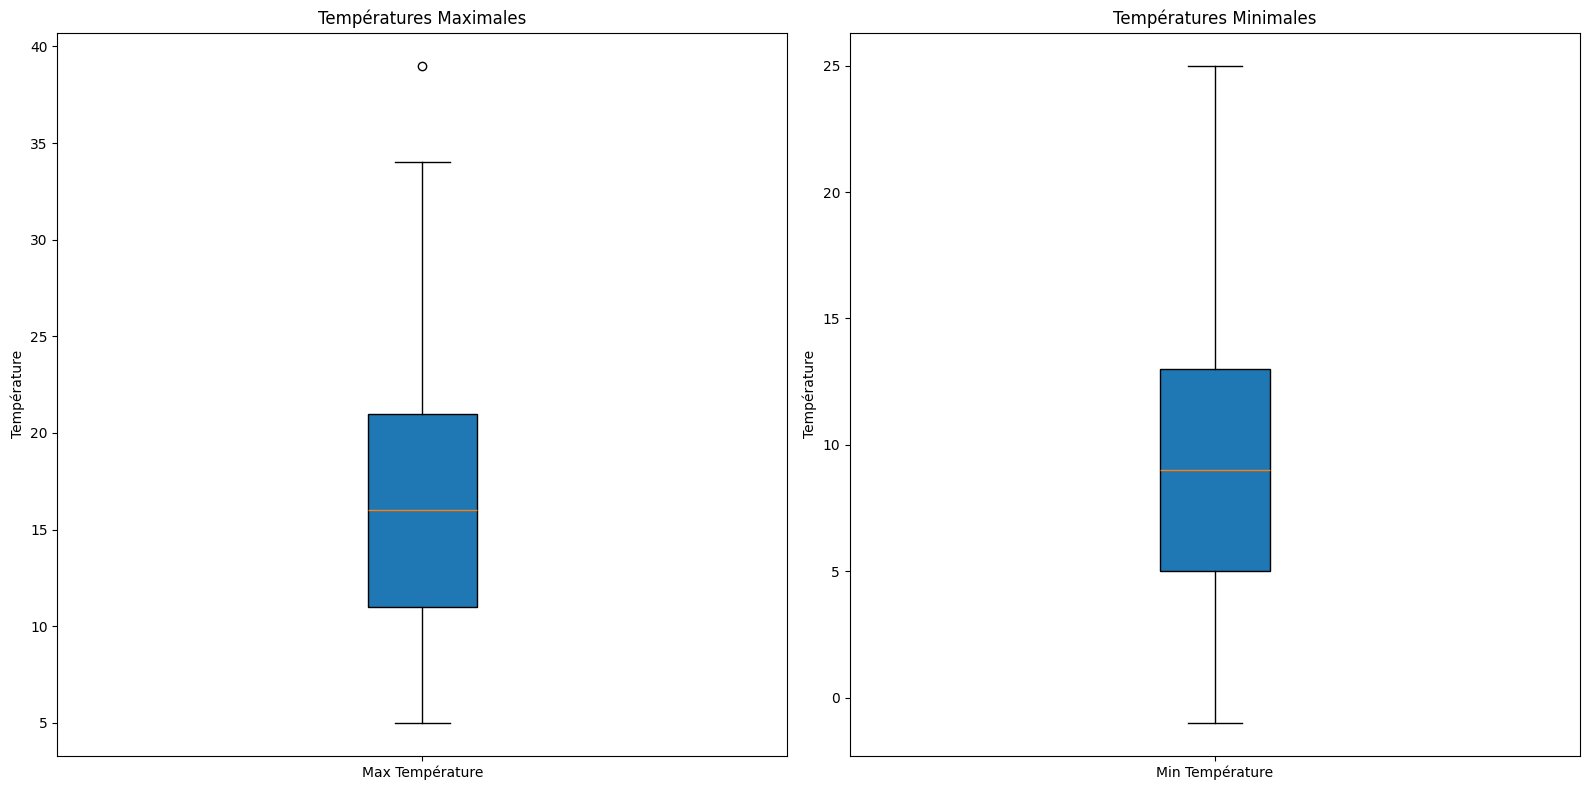

In [6]:
"""
Oui, il y a un outlier dans le boxplot des températures max, autour de 40°
"""

# Your code here :
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].boxplot(
    df["MAX_TEMPERATURE_C"],
    patch_artist=True
)
axes[0].set_title("Températures Maximales")
axes[0].set_ylabel("Température")
axes[0].set_xticklabels(["Max Température"])

axes[1].boxplot(
    df["MIN_TEMPERATURE_C"],
    patch_artist=True
)
axes[1].set_title("Températures Minimales")
axes[1].set_ylabel("Température")
axes[1].set_xticklabels(["Min Température"])

plt.tight_layout()
plt.show()


## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips :
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

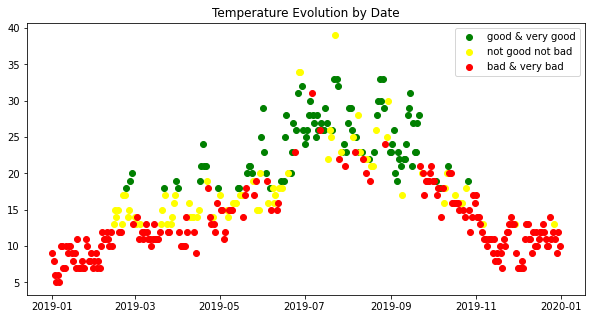

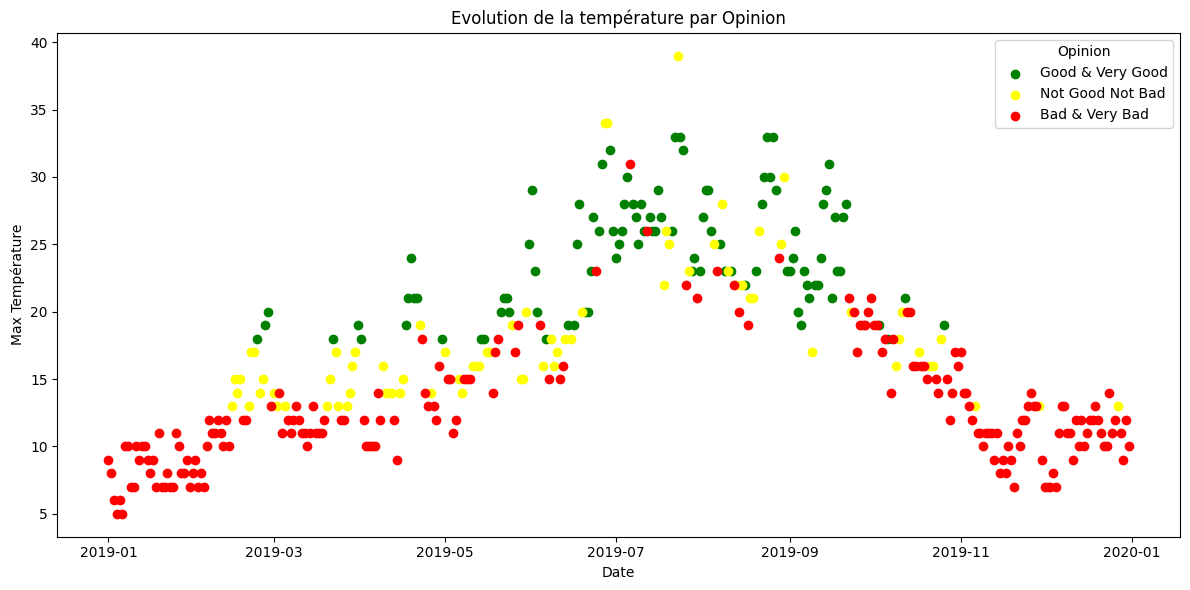

In [7]:
# It"s your turn now :

df_good = df[df["OPINION"].isin(["good", "very good"])]
df_bad = df[df["OPINION"].isin(["bad", "very bad"])]
df_neutre = df[df["OPINION"] == "not good not bad"]

plt.figure(figsize=(12, 6))

plt.scatter(
    df_good["DATE"],
    df_good["MAX_TEMPERATURE_C"],
    c="green",
    label="Good & Very Good"
)
plt.scatter(
    df_neutre["DATE"],
    df_neutre["MAX_TEMPERATURE_C"],
    c="yellow",
    label="Not Good Not Bad"
)
plt.scatter(
    df_bad["DATE"],
    df_bad["MAX_TEMPERATURE_C"],
    c="red",
    label="Bad & Very Bad"
)

plt.xlabel("Date")
plt.ylabel("Max Température")
plt.title("Evolution de la température par Opinion")
plt.legend(title="Opinion")

plt.tight_layout()
plt.show()
